### pandas

## 按照时间下载github上面的数据~

In [1]:
import pandas
import time
import matplotlib.pyplot as plt

In [2]:
current_year = time.strftime("-%Y", time.localtime())#获取年
current_month = time.strftime("%m-", time.localtime())#获取月
current_day = time.strftime("%d", time.localtime())#获取日

In [3]:
yesterday = str(int(current_day)-1)#convert different formate

In [4]:
date = current_month + yesterday + current_year #打印昨日日期
date#   mm-dd-yyyy

'03-29-2020'

In [5]:
# current_year = time.strftime("-%Y", time.localtime())#-2020
# current_month = time.strftime("%m-", time.localtime())#03-
# current_day = time.strftime("%d", time.localtime())
# path_to_dataset = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + date + '.csv'
# df1 = pandas.read_csv(path_to_dataset, sep=',')

In [6]:

#重新加载一遍日期
current_year = time.strftime("-%Y", time.localtime())
current_month = time.strftime("%m-", time.localtime())
current_day = time.strftime("%d", time.localtime())#设置时间
current_day = int(current_day) - 1


#将今10日的值赋给df1，df2....
i = 1
while i <=18 :
    current_day = current_day - 1
    date = current_month + str(current_day) + current_year #打印昨日日期
    path_to_dataset = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + date + '.csv'
    name='df'+str(i)
    locals()['df'+str(i)]= pandas.read_csv(path_to_dataset, sep=',')#动态命名 df1,df2,...df10，将data一一赋值
    i = i + 1

## 筛选出所有为‘Australia’的国家的信息~

In [7]:
df1.head()#df1到df18，共18天的数据

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-28 23:05:37,34.223334,-82.461707,3,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-28 23:05:37,30.295065,-92.414197,9,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-28 23:05:37,37.767072,-75.632346,2,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-28 23:05:37,43.452658,-116.241552,76,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-28 23:05:37,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [8]:
# row_name = ['Australia']
# au = df1[df1['Country_Region'].isin(row_name)]
# au.loc[:,['Province_State','Confirmed']]
i = 1
list_confirmed = []#获取list表示近十天的感染人数
list_deaths = []
list_recovered = []
while i <=7:
    row_name = ['Australia']
    locals()['au'+str(i)] = locals()['df'+str(i)][locals()['df'+str(i)]['Country_Region'].isin(row_name)]    #get day 1~6 data
    au = locals()['au'+str(i)]
    confirmed_cases = au.Confirmed.sum()
    Deaths_cases = au.Deaths.sum()
    Recovered_cases = au.Recovered.sum()
    list_confirmed.append(confirmed_cases)#获取list表示近十天的感染人数
    list_deaths.append(Deaths_cases)
    list_recovered.append(Recovered_cases)
    i = i + 1

    
i = 8
while i <=18:
    row_name = ['Australia']
    locals()['au'+str(i)] = locals()['df'+str(i)][locals()['df'+str(i)]['Country/Region'].isin(row_name)]    # get day 7~10 data
    au = locals()['au'+str(i)]
    confirmed_cases = au.Confirmed.sum()#将所有Confirmed列中的数据叠加起来
    list_confirmed.append(confirmed_cases)#获取list表示近十天的感染人数
    list_deaths.append(Deaths_cases)
    list_recovered.append(Recovered_cases)
    i = i + 1

In [9]:
i = 0
states_au = []
cases = []
while i <= 7 :
    x = au1.iat[i,2]#获取第i行第11列的值（states的地方）
    y = au1.iat[i,7]
    states_au.append(x)
    cases.append(y)
    i = i + 1

In [10]:
states_au_cases = pandas.DataFrame({
        'cases':cases,
        'index' :states_au
    })
states_au_cases

,cases,index
0,71,Australian Capital Territory
1,1617,New South Wales
2,15,Northern Territory
3,625,Queensland
4,287,South Australia
5,62,Tasmania
6,685,Victoria
7,278,Western Australia


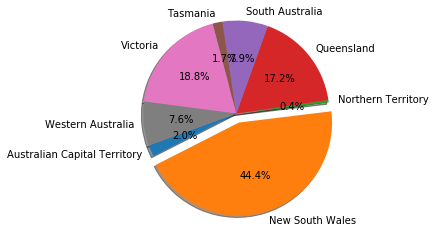

In [11]:
# states_au_cases.plot.pie(y = 'cases',figsize=(10, 10))
# labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
# sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(cases, explode=explode, labels=states_au, autopct='%1.1f%%',
        shadow=True, startangle=200)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1
plt.show()

In [12]:
list_confirmed.reverse()#获取list表示近十天的感染人数
list_deaths.reverse()
list_recovered.reverse()

In [13]:
yesterday = int(yesterday)
australia_cases = pandas.DataFrame({
    'confirmed_cases': list_confirmed,
    'deaths_cases': list_deaths,
    'recovered_cases': list_recovered,
    'date': [str(yesterday-17),str(yesterday-16),str(yesterday-15),str(yesterday-14),str(yesterday-13),str(yesterday-12),str(yesterday-11), str(yesterday-10),str(yesterday-9),str(yesterday-8),str(yesterday-7),str(yesterday-6),str(yesterday-5),str(yesterday-4),str(yesterday-3),str(yesterday-2),str(yesterday-1), str(yesterday)]
})

Text(0.5, 1.0, 'Australia confirmed cases')

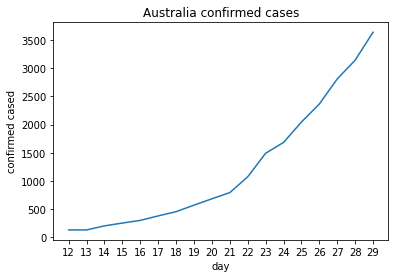

In [14]:
plt.plot(australia_cases["date"], australia_cases["confirmed_cases"])
plt.xlabel('day')
plt.ylabel('confirmed cased')
plt.title('Australia confirmed cases')

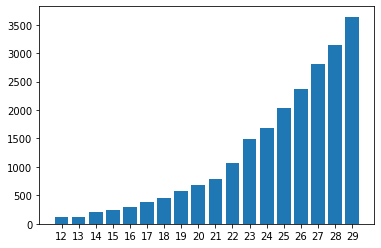

In [15]:
plt.bar(australia_cases['date'], australia_cases['confirmed_cases'])
plt.show()#列出柱状图

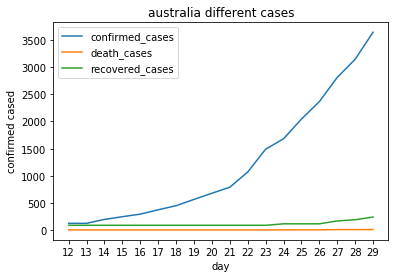

In [16]:
plt.plot(australia_cases["date"], australia_cases["confirmed_cases"], label="confirmed_cases")#第一个label
plt.plot(australia_cases["date"], australia_cases["deaths_cases"], label="death_cases")#第一个label
plt.plot(australia_cases["date"], australia_cases["recovered_cases"], label="recovered_cases")#第一个label
plt.legend(loc='upper left')#图列位置，可选best，center等
plt.xlabel('day')
plt.ylabel('confirmed cased')
plt.title('australia different cases')
plt.show()

## Us cases

In [17]:
# row_name = ['Australia']
# au = df1[df1['Country_Region'].isin(row_name)]
# au.loc[:,['Province_State','Confirmed']]
i = 1
list_us=[]
while i <=7:
    row_name = ['US']
    locals()['us'+str(i)] = locals()['df'+str(i)][locals()['df'+str(i)]['Country_Region'].isin(row_name)]    #get day 1~6 data
    us = locals()['us'+str(i)]
    confirmed_cases = us.Confirmed.sum()
    list_us.append(confirmed_cases)#获取list表示近十天的感染人数
    i = i + 1

In [18]:
i = 8
while i <=18:
    row_name = ['US']
    locals()['us'+str(i)] = locals()['df'+str(i)][locals()['df'+str(i)]['Country/Region'].isin(row_name)]    # get day 7~10 data
    us = locals()['us'+str(i)]
    confirmed_cases =us.Confirmed.sum()#将所有Confirmed列中的数据叠加起来
    list_us.append(confirmed_cases)#获取list表示近十天的感染人数
    i = i + 1

In [19]:
list_us.reverse()
list_us

[1281,
 1663,
 2179,
 2726,
 3499,
 4632,
 6421,
 7786,
 13680,
 19101,
 25493,
 33746,
 43667,
 53740,
 65778,
 83836,
 101657,
 121478]

In [20]:
yesterday = int(yesterday)
us_cases = pandas.DataFrame({
    'cases': list_us,

    'date': [str(yesterday-17),str(yesterday-16),str(yesterday-15),str(yesterday-14),str(yesterday-13),str(yesterday-12),str(yesterday-11),str(yesterday-10),str(yesterday-9),str(yesterday-8),str(yesterday-7),str(yesterday-6),str(yesterday-5),str(yesterday-4),str(yesterday-3),str(yesterday-2),str(yesterday-1), str(yesterday)]
})

Text(0.5, 1.0, 'US confirmed cases')

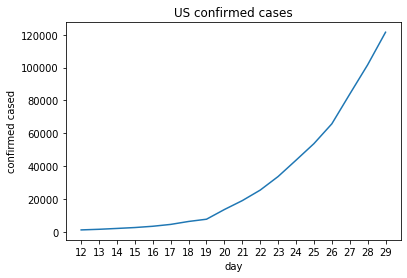

In [21]:
import matplotlib.pyplot as plt
plt.plot(us_cases["date"], us_cases["cases"])
plt.xlabel('day')
plt.ylabel('confirmed cased')
plt.title('US confirmed cases')

### below is self-learning, 以下是自学部分与项目无关

## ".loc" & ".iloc" to slice the dataset

In [ ]:
df.loc[5]#列出第几行，从0开始

In [ ]:
df.tail(n = 1)#列出最后n个数列

df.head(n = 2)#列出前n个数列D

In [ ]:
df.loc[0]#列出第一列的具体信息

In [ ]:
df.iloc[-1]

In [ ]:
   subsite = df.loc[54:100,['Country/Region','Confirmed','Deaths','Recovered','Last Update']]#列出第54——57行，列属性的信息

In [ ]:
a = list(range(2,10,2)) #列出了2到10（不包括10）间隔为2的matrix
a

b=df.iloc[:,a] #列出a所表示的列的全部信息
b.head()

In [ ]:
b = df.iloc[43,a]
b

In [ ]:
print("df.head() is {} , df.loc[] is {}\n and df.iloc[] is {}".format(type(df.head(n = 1)),type(df.loc[0]),type(df.iloc[0])))

In [ ]:
#df.iloc[3428,[1,3,5]]
#df.loc[3428:,['Admin2','Country_Region','Lat']]
df.head()

In [ ]:
df.groupby('FIPS')

In [ ]:
df.shape[0]#一共多少行
df.shape[1]#一共多少列

In [ ]:
list(range(4))

In [ ]:
x = df.groupby('Confirmed')['FIPS'].median()
x.hist()#柱状图
x.plot()#折现图

In [ ]:
df.groupby('Country_Region')

In [ ]:
y = pandas.DataFrame({

    'Name': ['Rosaline Franklin', 'William Gosset','a'],

    'Occupation': ['Chemist', 'Statistician','a'],

    'Born': [1,2,3],

    'Died': ['1958-04-16', '1937-10-16','wdwdw'],

    'Age': [37, 61, 44]})

z = y.groupby('Born')['Age'].mean()
z.hist()

In [ ]:
con = df['Confirmed']
[con > con.mean()]#返回bool型值
con[con > con.mean()]#返回所有大于con.mean()的值

### Seaborn & Matplotlib ~

In [ ]:
import seaborn as sns
anscombe = sns.load_dataset("anscombe")
anscombe #在seaborn库中引用数据集

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']#根据dataset分出不同的值

In [ ]:
plt.plot(dataset_4['x'], dataset_4['y'])#打印出第四个dataset的值

In [ ]:
fig = plt.figure()
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

In [ ]:
axes1.plot(dataset_1['x'], dataset_1['y'])
axes2.plot(dataset_2['x'], dataset_2['y'] )
axes3.plot(dataset_3['x'], dataset_3['y'] )
axes4.plot(dataset_4['x'], dataset_4['y'])

axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")

fig.suptitle("Anscombe Data")

fig.tight_layout()

In [ ]:
fig

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips.head()

In [ ]:
fig = plt.figure()

axes1 = fig.add_subplot(1, 1, 1)

axes1.hist(tips['total_bill'], bins=10)

axes1.set_title('Histogram of Total Bill')

axes1.set_xlabel('Frequency')

axes1.set_ylabel('Total Bill')


In [ ]:
scatter_plot = plt.figure()

axes1 = scatter_plot.add_subplot(1, 1, 1)

axes1.scatter(tips['total_bill'], tips['tip'])

axes1.set_title('Scatterplot of Total Bill vs Tip')

axes1.set_xlabel('Total Bill')

axes1.set_ylabel('Tip')

In [ ]:
# create a color variable based on sex



tips['sex_color'] = tips['sex'].apply(recode_sex)



scatter_plot = plt.figure()

axes1 = scatter_plot.add_subplot(1, 1, 1)

axes1.scatter(

    x=tips['total_bill'],

    y=tips['tip'],



    # set the size of the dots based on party size

    # we multiply the values by 10 to make the points bigger

    # and to emphasize the differences

    s=tips['size'] * 10,



    # set the color for the sex

    c=tips['sex_color'],



    # set the alpha value so points are more transparent

    # this helps with overlapping points

    alpha=0.5)



axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')

axes1.set_xlabel('Total Bill')

axes1.set_ylabel('Tip')


In [ ]:
checkpoint = [df.loc[:,['Country_Region']] != 'Australia']